### setting

Open BigQuery Console  <br>
1.In the Google Cloud Console, on the Navigation menu , click BigQuery. The Welcome to BigQuery in the Cloud 
Console dialog opens. This dialog provides a link to the quickstart guide and lists UI updates. <br>
2.Click Done to close the dialog. <br>
Start a JupyterLab Notebook Instance <br>
1.Click on the Navigation Menu. <br>
2.Navigate to Artificial Intelligence, Vertex AI, then to Workbench. <br>
3.You'll be redirected to User-Managed Notebooks tab on the main page for Notebooks on Vertex AI. <br>
When the tab loads if you notice a link entitled Enable Notebooks API, click that link to allow the background 
Notebooks API to be upgraded. The upgrade will occur promptly. <br>
Click on the New Instance icon on the top of the page. <br>
4.In the menu that pops down, select the Python 3 option. <br>
5.A screen entitled New notebook will be shown. Leave the default options and click on Create. <br>
6.After a few minutes, the Vertex AI console will have your instance name followed by Open Jupyterlab. Click Open 
Jupyterlab. <br>
7.A new tab will open in your browser with the JupyterLab environment. Select Python 3 under Notebook. <br>

### Execute a BigQuery query

1.Execute the following Python install command by hitting Shift + Enter in the first cell of the notebook to install 
the google-cloud-bigquery library at version 1.25.0.
```shell
!pip install google-cloud-bigquery==1.25.0 --use-feature=2020-resolver
```
Note: You may safely ignore the following notifications: WARNING: --use-feature=2020-resolver... and ERROR: pip's dependency 
resolver....Restart the kernel by clicking Restart kernel icon > Restart.

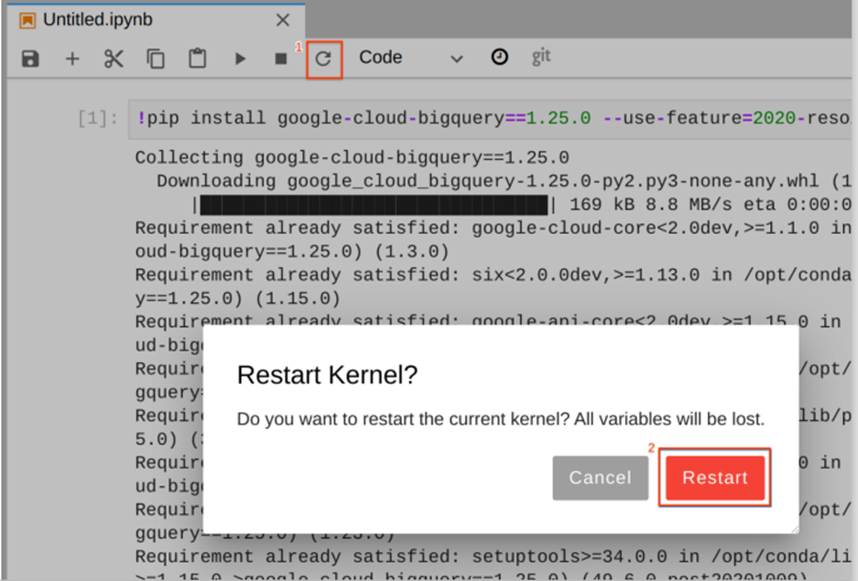

In [ ]:
# 2.Enter the following query in the second cell of the notebook.
%%bigquery df
SELECT
departure_delay,
COUNT(1) AS num_flights,
APPROX_QUANTILES(arrival_delay, 10) AS arrival_delay_deciles
FROM
`bigquery-samples.airline_ontime_data.flights`
GROUP BY
departure_delay
HAVING
num_flights > 100
ORDER BY
departure_delay ASC

1.To get a DataFrame containing the data we need we first have to wrangle the raw query output. Enter the following code in a new 
cell to convert the list of arrival_delay_deciles into a Pandas Series object. The code also renames the resulting columns

In [ ]:
import pandas as pd
percentiles = df['arrival_delay_deciles'].apply(pd.Series)
percentiles.rename(columns = lambda x : '{0}%'.format(x*10), inplace=True)
percentiles.head()

2.Since we want to relate departure delay times to arrival delay times we have to concatenate our percentiles table to 
the departure_delay field in our original DataFrame. Execute the following code in a new cell:


In [ ]:
df = pd.concat([df['departure_delay'], percentiles], axis=1)
df.head()


3.Before plotting the contents of our DataFrame, we'll want to drop extreme values stored in 
the 0% and 100% fields. Execute the following code in a new cell:

In [ ]:
df.drop(labels=['0%', '100%'], axis=1, inplace=True)
df.plot(x='departure_delay', xlim=(-30,50), ylim=(-50,50));

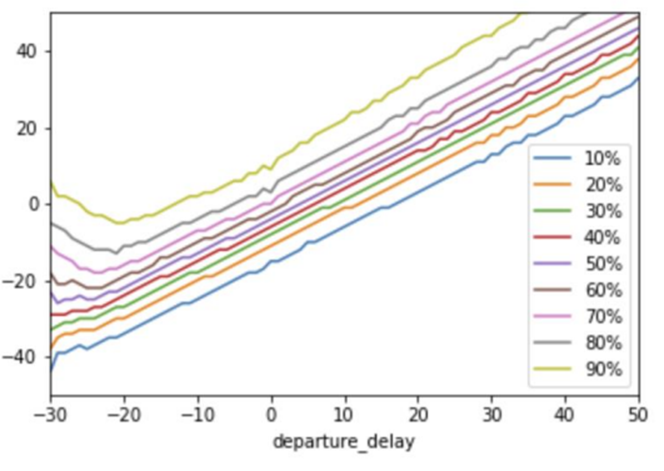